# First crawl

I've never liked learning languages (programming or otherwise). The way I learned english and any phrase I know from any other language (elen sila lumenn omentielvo!) is by watching movies or reading books/blogs. As for programming languages, I have learned by having to solve problems so I'll do just that.

## The birthday candle problem
I follow Brent Yorgey's [The Math Less Traveled](http://mathlesstraveled.com/) and --by the time I'm writing this-- I've just read his post on [The birthday candle problem](http://mathlesstraveled.com/2015/08/07/the-birthday-candle-problem/), as it sounds fun I decided to start my first introduction to `Python` by trying to run some simulations from it. You can read more about it on his post, but I'll quote him on the problem:

>A birthday cake has $n$ lit candles. At each step you pick a number $1 \leq k \leq n$ uniformly at random and blow out $k$ candles. If any candles remain lit, the process repeats (using a new value of $n$). As a function of $n$, what is the expected number of rounds needed to blow out all the candles?

I began this blog by saying that I wanted first of all to replace my need of `MATLAB`, so what I did was first to write some `MATLAB` code and I'll try to reproduce it. I wrote the most straightforward code I came up with. Here it is:

``` Matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% PARAMETERSOF THE SIMULATION %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
obs=100; % Number of observations to estimate expected value for each n
N=300; % Max number of candles


%%%%%%%%%%%%%%%%%%%%%%
% PART 1: SIMULATION %
%%%%%%%%%%%%%%%%%%%%%%
K=zeros(N,1); % For storing the expected values

for n=1:N % Iterate for each number of candles
    ki=0; % To save number of rounds
    for j=1:obs % Generate observations
        ni=n;
        k=0; % Number of steps in this observation
        while ni>0 % Keep doing while there are lit candles
            k=k+1; % Add one more step
            ni=ni-floor((rand()*ni))-1; % Blow candles!
        end
        ki=ki+k; % Sum of rounds
    end
    K(n)=ki/obs; % Average rounds for this number of candles
end

%%%%%%%%%%%%%%%%%%%%
% PART 2: PLOTTING %
%%%%%%%%%%%%%%%%%%%%
plot(K) % Plot the estimates of expected value
hold on

%%%%%%%%%%%%%%%%%%%%%
% PART 2: MODELLING %
%%%%%%%%%%%%%%%%%%%%%
aaa=fitlm(1:N,exp(K)); % Fit a linear model to exp(k) (believe me, it looks logaritmic)

% FINAL PLOT
plot(1:N,log(aaa.Fitted)) % Fit fitted values (believe me, it looks great)
xlabel('n')
ylabel('Average rounds')
```

I put it for reference for those who would like to run some `MATLAB` code. Now lets begin with the quest to find everything I need.

It seems that if I want to do numeric stuff I need to load a certain library called `numpy`. It's my first library load. Yay!

In [16]:
import numpy as np

### Random numbers
If we want to blow out candles, and who doesn't, we need some random numbers. Inside numpy, there's this thing called `random` that has a function called `random_integers` that can generate some sequence of random numbers exactly how we need: given some $n$ generate a number between $1$ and $n$. I'll work with $n=10$.

In [17]:
n = 10
print(np.random.random_integers(1,n,))

9


To see it better lets generate 5 numbers.

In [18]:
print(np.random.random_integers(1,n,5))

[ 7 10  4  6  6]


It looks kinda...long. Maybe later I'll learn some way to clean it up.

### Loops
Anyway now I have some random numbers and need a `while` loop to keep blowing out candles until there's none left.

In [19]:
n=10
k=0
while n>=1:
    k+=1
    r=np.random.random_integers(1,n)
    print("Round %s: From %s candles, I blow out %s." % (k,n,r))
    n=n-r

Round 1: From 10 candles, I blow out 8.
Round 2: From 2 candles, I blow out 2.


Now lets make $M$ simulations to get an estimate of the expected value via the mean. Here, `range(min,max)` generates a sequence of numbers $min, min+1,\dots,max-1$

In [23]:
M=4
Kj=np.zeros(M)

for j in range(0,M):
        ni=n
        k=0
        while ni>=1:
            ni=ni-np.random.random_integers(1,ni)
            k+=1
        Kj[j]=k
print(Kj)
print("The average is: %s." % np.mean(Kj))

[ 0.  0.  0.  0.]
The average is: 0.0.


### Functions
Now I'll define it as a function to call it easily by the number of initial candles $n$ and the number of simulations $M$.

In [28]:
n=10
M=4

def candles(n,M):
    Kj=np.zeros(M)
    for j in range(0,M):
        ni=n
        k=0
        while ni>=1:
            ni=ni-np.random.random_integers(1,ni)
            k+=1
        Kj[j]=k
    return np.mean(Kj)

K = candles(n,M)
print("With %s candles, I needed %s average rounds with a sample size of %s." % (n,K,M))

With 10 candles, I needed 3.25 average rounds with a sample size of 4.


With this I can easily make simulations for lots of values of $n$. Let's try for $n=1,2,\dots,10$ with a sample size of $M=1000$. 

In [30]:
M=1000
N=10

K=np.zeros(N)
for n in range(1,N+1):
    K[n-1]=candles(n,M)
    print("With %s candles, I needed %s rounds on average." % (n,K[n-1]))

With 1 candles, I needed 1.0 rounds on average.
With 2 candles, I needed 1.539 rounds on average.
With 3 candles, I needed 1.847 rounds on average.
With 4 candles, I needed 2.087 rounds on average.
With 5 candles, I needed 2.318 rounds on average.
With 6 candles, I needed 2.422 rounds on average.
With 7 candles, I needed 2.633 rounds on average.
With 8 candles, I needed 2.73 rounds on average.
With 9 candles, I needed 2.841 rounds on average.
With 10 candles, I needed 2.954 rounds on average.


With this, I've completed part 1 of the code. I still need to plot and model the data.

### Plotting
I need to load another library called `matplotlib` to get some plotting done. The second line is for the graphs to appear right here instead of in a new window.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

For plotting, you "create" the plot, then make customizations (like labels and colors), and the you `show` it.

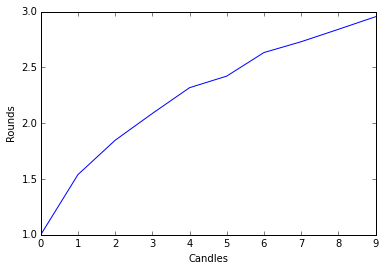

In [33]:
plt.plot(K)
plt.ylabel('Rounds')
plt.xlabel('Candles')
plt.show()

Nice enough. But lets get crazier with the simulations and run it for more candles...lets say $n=1,\dots,500$. And see what happens.

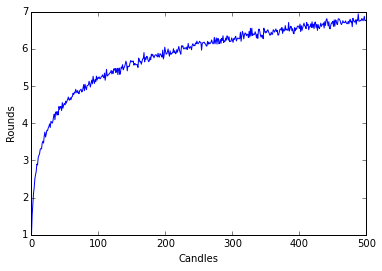

In [35]:
M=1000
N=500

K=np.zeros(N)
for n in range(1,N+1):
    K[n-1]=candles(n,M)

plt.plot(K)
plt.ylabel('Rounds')
plt.xlabel('Candles')
plt.show()

It looks kinda logarithmic. But don't trust my word for it, lets see the graph of the natural logaritm.

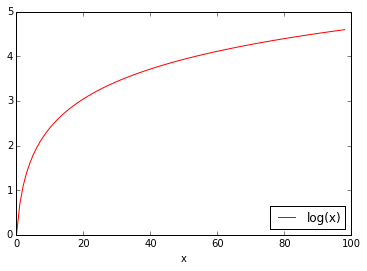

In [37]:
plt.plot(np.log(range(1,100)),color="r",label="log(x)")
plt.xlabel("x")
plt.legend(loc=4)
plt.show()

That means we could try to adjust a linear model to the exponential of $K$.

## Modelling

First let's see that $e^K$ looks indeed linear:

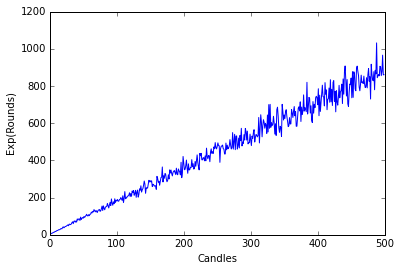

In [39]:
plt.plot(np.exp(K),label="Exp(K)")
plt.ylabel('Exp(Rounds)')
plt.xlabel('Candles')
plt.show()

Now we need a library for statistical modelling, so lets call `scipy` and it's `stats` package.

In [40]:
from scipy import stats as stat

Now I'll magically perform linear regression on $e^K$.

In [42]:
lin_K = stat.linregress(range(1,N+1), y=np.exp(K))
print(lin_K)

LinregressResult(slope=1.774778629752801, intercept=2.1965452757355592, rvalue=0.99113655168800263, pvalue=0.0, stderr=0.010659771794655069)


It seems it didn't crash, so let's try to plot it

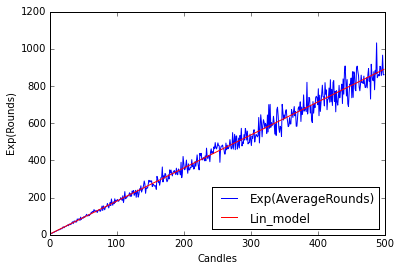

In [43]:
plt.plot(np.exp(K),label="Exp(AverageRounds)")
plt.plot(lin_K.intercept+lin_K.slope*range(1,N+1),label="Lin_model",color='r')
plt.ylabel('Exp(Rounds)')
plt.xlabel('Candles')
plt.legend(loc=4)
plt.show()

Pretty neat, although I would prefer a linear regression function with some kind of predict function or fitted values but I'll leave that for other post.

### Final graph and thoughts
This is the final product:

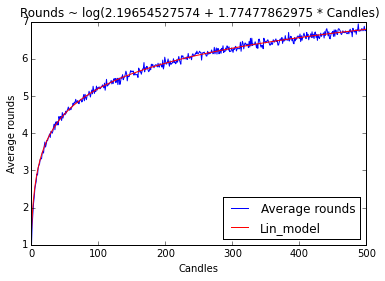

In [44]:
plt.plot(K,label="Average rounds")
plt.plot(np.log(lin_K.intercept+lin_K.slope*range(1,N+1)),label="Lin_model",color='r')
plt.ylabel('Average rounds')
plt.xlabel('Candles')
plt.title("Rounds ~ log(%s + %s * Candles)" % (lin_K.intercept,lin_K.slope))
plt.legend(loc=4)
plt.show()